## Notes
- Decision trees are capable of handling both continuous and categorical variables.
- Decision trees provide a clear indication of which fields are most important for prediction or classification
- Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.
- Decision trees are prone to errors in classification problems with many class and a relatively small number of training examples.  - Sparse

## DO decision trees work on categorical data?
CART does not. we need to use label encoding or binary encoding. 
Read this link: https://stats.stackexchange.com/questions/238530/why-does-decisiontreeclassifier-require-numeric-variables-for-inputs

criteria: lowest entropy or maximum information gain to decide whether to split a node

## Classification 

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

In [13]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [8]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# what is the kind of flower given the above x values

In [10]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y[1:10]

[setosa, setosa, setosa, setosa, setosa, setosa, setosa, setosa, setosa]
Categories (3, object): [setosa, versicolor, virginica]

Although, decision trees can handle categorical data, we still encode the
targets in terms of digits (i.e. setosa=0, versicolor=1, virginica=2) in order to create a confusion matrix at a later point. Fortunately, the pandas library provides a method for this very purpose.

In [18]:

y = pd.get_dummies(y)
y[1:10]

,setosa,versicolor,virginica
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size =0.25)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.tree import export_graphviz

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

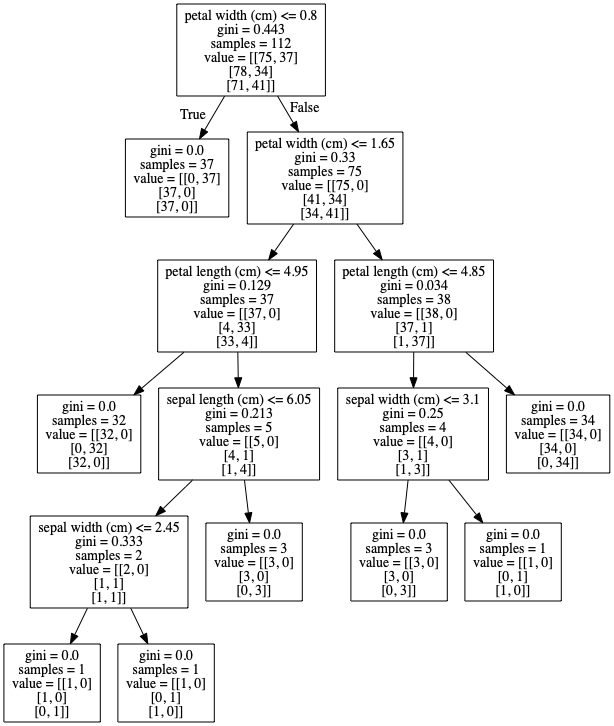

In [32]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#interpretation?

In [33]:
y_pred = dt.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [40]:


print ('Accuracy Score :',accuracy_score(y_test, y_pred) )


Accuracy Score : 0.9736842105263158


In [42]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38



In [47]:
confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

## Regression

We split based on the atrribute that reduces the standard deviation to the maximum extent
Also, we use CV to check to terminate the splitting

In [95]:
salaries = pd.read_csv("position_salaries.csv")

In [96]:
salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [97]:
salaries.isnull().sum(axis = 0)

Position    0
Level       0
Salary      0
dtype: int64

In [98]:
position = pd.get_dummies(salaries['Position'])

In [99]:
type(position)

pandas.core.frame.DataFrame

In [105]:
df =salaries.join(position)


In [108]:
df.drop(['Position'],axis = 1,inplace=True)


In [115]:
y = df['Salary']
X = df.drop(['Salary'],axis = 1)


In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
reggressor = DecisionTreeRegressor(random_state=0)

In [116]:
reggressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [117]:
df

,Level,Salary,Business Analyst,C-level,CEO,Country Manager,Junior Consultant,Manager,Partner,Region Manager,Senior Consultant,Senior Partner
0,1,45000,1,0,0,0,0,0,0,0,0,0
1,2,50000,0,0,0,0,1,0,0,0,0,0
2,3,60000,0,0,0,0,0,0,0,0,1,0
3,4,80000,0,0,0,0,0,1,0,0,0,0
4,5,110000,0,0,0,1,0,0,0,0,0,0
5,6,150000,0,0,0,0,0,0,0,1,0,0
6,7,200000,0,0,0,0,0,0,1,0,0,0
7,8,300000,0,0,0,0,0,0,0,0,0,1
8,9,500000,0,1,0,0,0,0,0,0,0,0
9,10,1000000,0,0,1,0,0,0,0,0,0,0


In [121]:
X_pred = [2,0,0,0,0,1,0,0,0,0,0]

In [125]:
df_test = df.iloc[1:3,:]
X_pred = df_tes

In [128]:
y_pred = df_test['Salary']
X_pred = df_test.drop(['Salary'],axis = 1)
X_pred

,Level,Business Analyst,C-level,CEO,Country Manager,Junior Consultant,Manager,Partner,Region Manager,Senior Consultant,Senior Partner
1,2,0,0,0,0,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,0


In [127]:
reggressor.predict(X_pred)

array([50000., 60000.])

In [129]:
y_pred

1    50000
2    60000
Name: Salary, dtype: int64

In [ ]:
#did not split since data has only 10 rows. I know it is wrong. All this exercise is just to keep the code handy.